Primeiro passo: Passar a tabela para python usando dicionário

In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [193]:


data = {
    "Item": list(range(1, 21)),
    "alpha_ij": [ #Variável independente
        90.0000, 94.7368, 99.4737, 104.2105, 108.9474,
        113.6842, 118.4211, 123.1579, 127.8947, 132.6316,
        137.3684, 142.1053, 146.8421, 151.5790, 156.3158,
        161.0526, 165.7895, 170.5263, 175.2632, 180.0000
    ],
    "Qij_alpha": [ #Variável dependente
        20.0000, 21.0502, 22.0862, 23.0939, 24.0604,
        24.9735, 25.8227, 26.5992, 27.2962, 27.9091,
        28.4354, 28.8752, 29.2308, 29.5069, 29.7103,
        29.8498, 29.9360, 29.9809, 29.9976, 30.0000
    ]
}

df = pd.DataFrame(data)

df["alpha_ij_rad"] = df["alpha_ij"] * np.pi / 180

df


,Item,alpha_ij,Qij_alpha,alpha_ij_rad
0,1,90.0000,20.0000,1.570796
1,2,94.7368,21.0502,1.653469
2,3,99.4737,22.0862,1.736144
3,4,104.2105,23.0939,1.818816
4,5,108.9474,24.0604,1.901491
5,6,113.6842,24.9735,1.984164
6,7,118.4211,25.8227,2.066838
7,8,123.1579,26.5992,2.149511
8,9,127.8947,27.2962,2.232184
9,10,132.6316,27.9091,2.314858


Terceiro passo: Sistema de equações

Grau 2 (Calcular xi^2, xi^3, xi^4)

In [176]:

som_alpha_1 = 0
som_alpha_2 = 0
som_alpha_3 = 0
som_alpha_4 = 0

for i in df["alpha_ij_rad"]:
    som_alpha_1 += i
    som_alpha_2 += i**2
    som_alpha_3 += i**3
    som_alpha_4 += i**4

print(som_alpha_1)
print(som_alpha_2)
print(som_alpha_3)
print(som_alpha_4)


47.123891549176165
115.57827216586585
293.74371657944613
769.6707999536043


In [177]:
# Soma de Qij_alpha
som_qij = df["Qij_alpha"].sum()

# Soma de alpha_ij * Qij_alpha
som_alphaij_1_qij = (df["alpha_ij_rad"] * df["Qij_alpha"]).sum()

# Soma de (alpha_ij**2) * Qij_alpha
som_alphaij_2_qij = ((df["alpha_ij_rad"]**2) * df["Qij_alpha"]).sum()

print(som_qij)
print(som_alphaij_1_qij)
print(som_alphaij_2_qij)

538.4142999999999
1297.544537694877
3243.520729730998


In [ ]:
matriz_A = [
    [20, som_alpha_1, som_alpha_2],
    [som_alpha_1, som_alpha_2, som_alpha_3],
    [som_alpha_2, som_alpha_3, som_alpha_4]
]

matriz_X = [
    ["a0"],
    ["a1"],
    ["a2"]
]

matriz_B = [
    [som_qij],
    [som_alphaij_1_qij],
    [som_alphaij_2_qij]
]

In [179]:
# Função para resolver sistema linear por eliminação de Gauss
def eliminacao_gauss(A, B):
    n = len(A)

    # Transformar em matriz aumentada
    for i in range(n):
        A[i].append(B[i][0])

    # Eliminação
    for i in range(n):
        # Tornar o pivô = 1
        piv = A[i][i]
        for j in range(i, n+1):
            A[i][j] = A[i][j] / piv

        # Zerar abaixo do pivô
        for k in range(i+1, n):
            fator = A[k][i]
            for j in range(i, n+1):
                A[k][j] -= fator * A[i][j]

    # Substituição regressiva
    X = [0] * n
    for i in range(n-1, -1, -1):
        X[i] = A[i][n]
        for j in range(i+1, n):
            X[i] -= A[i][j] * X[j]

    return X



In [180]:


solucao_2 = eliminacao_gauss(matriz_A, matriz_B)
print("a0 =", solucao_2[0])
print("a1 =", solucao_2[1])
print("a2 =", solucao_2[2])

a0 = -15.898749434069536
a1 = 30.988014552616317
a2 = -5.224914139171061


Grau 3 (Adcionar o cálculo de xi^5 e xi^6)

In [181]:
som_alpha_5 = 0
som_alpha_6 = 0

for i in df["alpha_ij_rad"]:

    som_alpha_5 += i**5
    som_alpha_6 += i**6

print(som_alpha_5)
print(som_alpha_6)


2068.778844744664
5678.6560412260715


In [182]:
som_alphaij_3_qij = ((df["alpha_ij_rad"]**3) * df["Qij_alpha"]).sum()

print(som_alphaij_3_qij)

8371.22037520853


In [183]:
A = [
    [20, som_alpha_1, som_alpha_2, som_alpha_3],
    [som_alpha_1, som_alpha_2, som_alpha_3, som_alpha_4],
    [som_alpha_2, som_alpha_3, som_alpha_4, som_alpha_5],
    [som_alpha_3, som_alpha_4, som_alpha_5, som_alpha_6]
]

B = [
    [som_qij],
    [som_alphaij_1_qij],
    [som_alphaij_2_qij],
    [som_alphaij_3_qij]
]

In [184]:
solucao_3 = eliminacao_gauss(A, B)
print("a0 = ", solucao_3[0])
print("a1 = ", solucao_3[1])
print("a2 = ", solucao_3[2])
print("a3 = ", solucao_3[3])


a0 =  -15.899607532196047
a1 =  30.98916484719569
a2 =  -5.225414590065803
a3 =  7.07993194978544e-05


Polinômio de grau 2

In [185]:
print("P2(x) = ", solucao_2[0],"+" ,solucao_2[1], "x", solucao_2[2], "x^2")

P2(x) =  -15.898749434069536 + 30.988014552616317 x -5.224914139171061 x^2


Polinômio de grau 3

In [186]:
print("P3(x) = ", solucao_3[0],"+",solucao_3[1], "x", solucao_3[2], "x^2", "+", solucao_3[3],"x^3")

P3(x) =  -15.899607532196047 + 30.98916484719569 x -5.225414590065803 x^2 + 7.07993194978544e-05 x^3


In [ ]:

def P2(x):
    return solucao_2[0] + solucao_2[1]*x + solucao_2[2]*(x**2)

def P3(x):
    return solucao_3[0] + solucao_3[1]*x + solucao_3[2]*(x**2) + solucao_3[3]*(x**3)




In [188]:
# Valores previstos
df["P2"] = df["alpha_ij_rad"].apply(P2)
df["P3"] = df["alpha_ij_rad"].apply(P3)

# Erros
df["erro_P2"] = df["Qij_alpha"] - df["P2"]
df["erro_P3"] = df["Qij_alpha"] - df["P3"]

# Métricas
def metrics(y_true, y_pred):
    mae = np.mean(np.abs(y_true - y_pred))
    mse = np.mean((y_true - y_pred)**2)
    rmse = np.sqrt(mse)
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    r2 = 1 - (ss_res/ss_tot)
    return mae, rmse, r2

mae2, rmse2, r2_2 = metrics(df["Qij_alpha"], df["P2"])
mae3, rmse3, r2_3 = metrics(df["Qij_alpha"], df["P3"])

print("Modelo P2:")
print(" MAE =", mae2)
print(" RMSE =", rmse2)
print(" R² =", r2_2)

print("\nModelo P3:")
print(" MAE =", mae3)
print(" RMSE =", rmse3)
print(" R² =", r2_3)

Modelo P2:
 MAE = 0.05517792467015692
 RMSE = 0.06436635738055885
 R² = 0.9995990926919869

Modelo P3:
 MAE = 0.05517792466960554
 RMSE = 0.06436635710624024
 R² = 0.999599092695404


Calculando as potências reativas fornecidas por fase pelo compensador para
os ângulos de disparo alphaij: 180º, 130º, 120º, 115º, 100º e 90º.

In [189]:
Qij = []

for alpha in ((180*np.pi/180), (130*np.pi/180), (120*np.pi/180), (115*np.pi/180), (100*np.pi/180), (90*np.pi/180)):
    Qij.append(P2(alpha))

Qij

[29.88513385048676,
 27.51278760759454,
 26.083358440807267,
 25.24927386763753,
 22.269540189023893,
 19.88515110402779]

Plotando gráficos

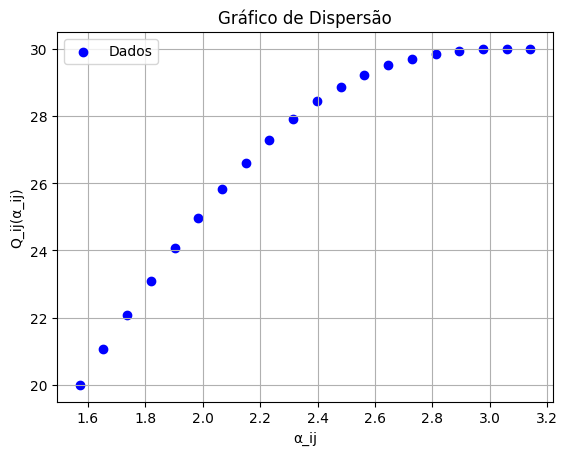

In [190]:
plt.scatter(df["alpha_ij_rad"], df["Qij_alpha"], color="blue", label="Dados")
plt.xlabel("α_ij")
plt.ylabel("Q_ij(α_ij)")
plt.title("Gráfico de Dispersão")
plt.legend()
plt.grid(True)
plt.show()

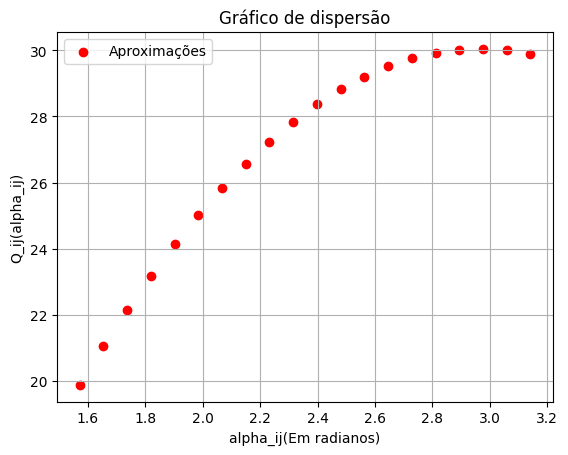

In [191]:
Qij_polinomio = []

for alpha in df["alpha_ij_rad"]:
    Qij_polinomio.append(P2(alpha))

plt.scatter(df["alpha_ij_rad"], Qij_polinomio, color="red", label="Aproximações")
plt.xlabel("alpha_ij(Em radianos)")
plt.ylabel("Q_ij(alpha_ij)")
plt.title("Gráfico de dispersão")
plt.legend()
plt.grid(True)
plt.show()

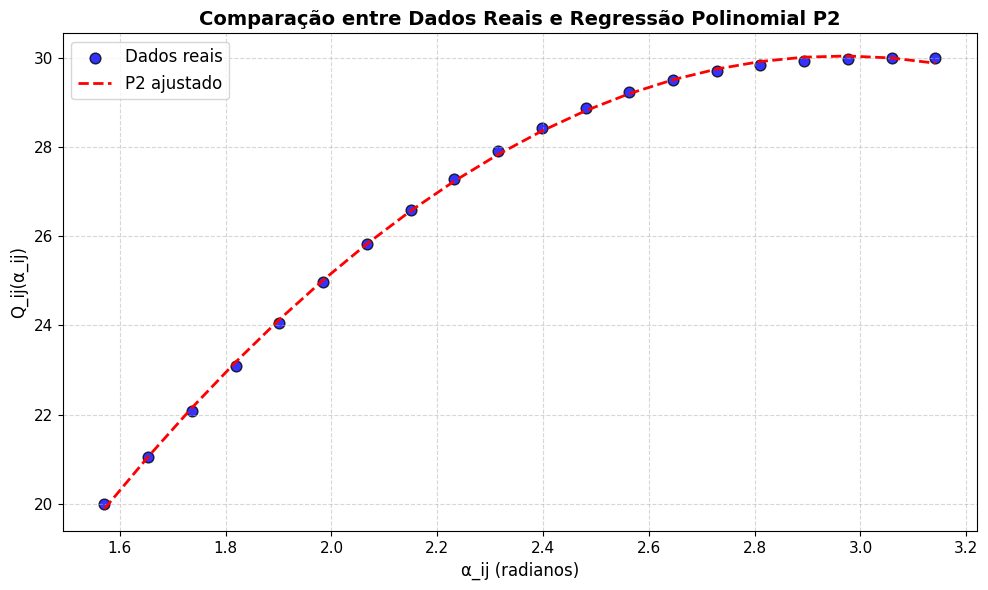

In [192]:
plt.figure(figsize=(10,6))

# Dados reais
plt.scatter(df["alpha_ij_rad"], df["Qij_alpha"], 
            color="blue", label="Dados reais", s=60, edgecolor='k', alpha=0.8)

# Polinômio ajustado
plt.plot(df["alpha_ij_rad"], Qij_polinomio, 
         color="red", label="P2 ajustado", linewidth=2, linestyle='--')

# Estilização
plt.xlabel("α_ij (radianos)", fontsize=12)
plt.ylabel("Q_ij(α_ij)", fontsize=12)
plt.title("Comparação entre Dados Reais e Regressão Polinomial P2", fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()